# MNIST autoencoder from nnBuilder

A basic convolutional autoencoder for MNIST

In [1]:
import numpy as np
import tensorflow as tf
import sys, os, seaborn, time
import matplotlib.pyplot as plt
sys.path.append('../nnBuilder')
from nnLayer import *
from nnInput import *
from nnTrainer import *
from nnHandler import *

In [2]:
data=Layer(type="MNIST",batch=128)
data_test=Layer(type="MNIST",test=True)
layers=[]
layers.append(dict(type="Identity_Label"))
layers.append(dict(type="Noise",rand_type="uniform",scale=.2,drop_on_test=True))
layers.append(dict(type="Convolution",pad="SAME",window=5,stride=1,size=2,relu=True))
layers.append(dict(type="Pool",pad="SAME",window=2,stride=2,pool_type="max"))
layers.append(dict(type="Convolution",pad="SAME",window=5,stride=1,size=4,relu=True))
layers.append(dict(type="Pool",pad="SAME",window=2,stride=2,pool_type="max"))
layers.append(dict(type="Linear",size=32*4))
layers.append(dict(type="Relu",size=49*4))
layers.append(dict(type="Reshape",shape=[-1,7,7,4]))
layers.append(dict(type="Convolution_Transpose",pad="SAME",window=5,stride=2,size=2,relu=True))
layers.append(dict(type="Convolution_Transpose",pad="SAME",window=5,stride=2,size=1,relu=False))
layers.append(dict(type="Sigmoid_Feature"))
network_def=dict(type="Network",layers=layers)
network=Layer(x=data,**network_def)
network_eval=network.copy(share_vars=True,test=True)
network_test=network.copy(x=data_test,share_vars=True,test=True)
trainer=LabeledTrainer(network=network,optimizer="adam",loss="mean_squared_error")
trainer_eval=LabeledTrainer(network=network_eval,optimizer="adam",loss="mean_squared_error",test=True)
tester=LabeledTrainer(network=network_test,loss="mean_squared_error",test=True)
sess=SessManager(data,network,trainer,data_test,network_test,tester,network_eval,trainer_eval)
sess.start()

Extracting /tmp/tensorflow/mnist/input_data\train-images-idx3-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data\train-labels-idx1-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data\t10k-images-idx3-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data\t10k-labels-idx1-ubyte.gz
train
Extracting /tmp/tensorflow/mnist/input_data\train-images-idx3-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data\train-labels-idx1-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data\t10k-images-idx3-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data\t10k-labels-idx1-ubyte.gz
test
Starting new session


<IPython.core.display.Javascript object>


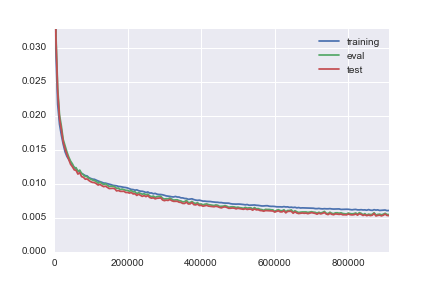

0.00882748
0.0085099
0.00829181
0.008666
0.00825303
0.00801887
0.00868293
0.00813344
0.00791394
0.00856352
0.00822333
0.00797433
0.00861899
0.00803227
0.00781664
0.00850475
0.0081515
0.00790393
0.00845603
0.00817381
0.00791708
0.00845418
0.00820613
0.0079656
0.00841047
0.00790618
0.00765349
0.00833883
0.00779113
0.00754724
0.00824764
0.00783244
0.00762478
0.00821014
0.00782628
0.00758009
0.00817423
0.00793127
0.0077197
0.00811601
0.00777618
0.00754559
0.00809143
0.00762446
0.00744931
0.00816652
0.00766413
0.00744919
0.00808541
0.00767283
0.00745841
0.00807731
0.00755896
0.00732409
0.0079607
0.00749612
0.0072886
0.00795446
0.00736446
0.007141
0.00787109
0.0074002
0.0071368
0.00785526
0.0075902
0.00733361
0.00774503
0.00725882
0.00705933
0.00778553
0.00727378
0.00707604
0.00782109
0.00743201
0.00727822
0.00770885
0.00721635
0.00696149
0.00763392
0.00713927
0.00692679
0.00759287
0.00724951
0.00703966
0.00762364
0.0070287
0.0068383
0.00755523
0.00706509
0.00686108
0.00747859
0.00692311
0.0

KeyboardInterrupt: 

<IPython.core.display.Javascript object>


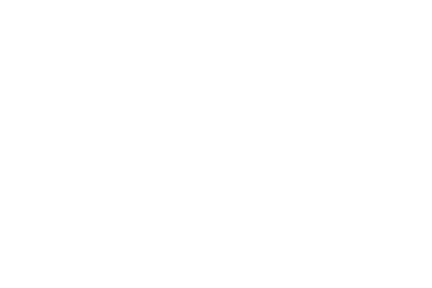

In [19]:
batches_per_step=5000#60000//128 #About 1 epoch
batches_per_eval=100
n_steps=500
def make_plt():
    %matplotlib notebook
    global fig,ax,train_plot,test_plot,eval_plot
    fig,ax = plt.subplots(1,1)
    train_plot=ax.plot([],[], label="training")[0]
    eval_plot=ax.plot([],[], label="eval")[0]
    test_plot=ax.plot([],[], label="test")[0]
    ax.set_ylim(0,1)
    plt.legend()
    fig.canvas.draw()
    time.sleep(.01)
def update_plt():
    x=[batches_per_step*i for i in range(len(trains))]
    train_plot.set_xdata(x)
    train_plot.set_ydata(trains)
    test_plot.set_xdata(x)
    test_plot.set_ydata(tests)
    eval_plot.set_xdata(x)
    eval_plot.set_ydata(evals)
    ax.set_xlim(0,x[-1])
    ax.set_ylim(0,trains[1]*1.1)
    fig.canvas.draw()
    #time.sleep(.01)
if "trains" not in globals():
    trains=[trainer.eval_loss(n=batches_per_eval,show=False)]
    evals=[trainer_eval.eval_loss(n=batches_per_eval)]
    tests=[tester.eval_loss(show=False)]
make_plt()
for i in range(n_steps):
    trainer.train(batches_per_step,learn_rate=1e-4)
    trains.append(trainer.eval_loss(n=batches_per_eval)) 
    evals.append(trainer_eval.eval_loss(n=batches_per_eval)) 
    tests.append(tester.eval_loss())
    update_plt()

<IPython.core.display.Javascript object>


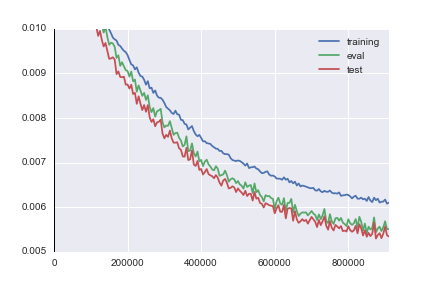

In [22]:
make_plt()
update_plt()
ax.set_ylim(0.005,.01)
fig.canvas.draw()

In [4]:
network.save() #The full network definition
save=network.save() #The full network definition
assert(Layer(x=data,**save).save()==save) #Consistency
print(save==network_def) #Saving adds stuff, should still be equivalent
save

False


{'layers': [{'type': 'Identity_Label'},
  {'combine_op': 'add',
   'drop_on_test': True,
   'mean': 0.0,
   'rand_type': 'uniform',
   'scale': 0.2,
   'type': 'Noise'},
  {'input_channels': None,
   'pad': 'SAME',
   'rand_scale': 0.1,
   'relu': True,
   'size': 2,
   'stride': 1,
   'type': 'Convolution',
   'window': 5},
  {'pad': 'SAME',
   'pool_type': 'max',
   'stride': 2,
   'type': 'Pool',
   'window': 2},
  {'input_channels': None,
   'pad': 'SAME',
   'rand_scale': 0.1,
   'relu': True,
   'size': 4,
   'stride': 1,
   'type': 'Convolution',
   'window': 5},
  {'pad': 'SAME',
   'pool_type': 'max',
   'stride': 2,
   'type': 'Pool',
   'window': 2},
  {'rand_scale': 0.1, 'size': 128, 'type': 'Linear'},
  {'rand_scale': 0.1, 'size': 196, 'type': 'Relu'},
  {'shape': [-1, 7, 7, 4], 'type': 'Reshape'},
  {'input_channels': None,
   'pad': 'SAME',
   'rand_scale': 0.1,
   'relu': True,
   'size': 2,
   'stride': 2,
   'type': 'Convolution_Transpose',
   'window': 5},
  {'input_

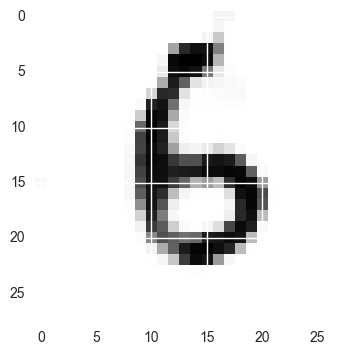

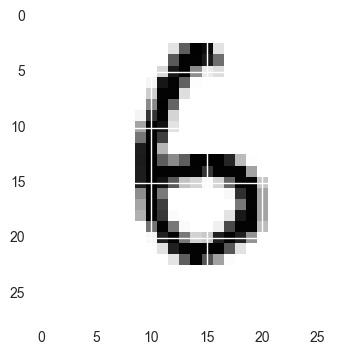

In [5]:
n=21
%matplotlib inline
plot(sess.run(network_test.get())[n,:,:,0])
plt.show()
%matplotlib inline
plot(sess.run(data_test.get())[n,:,:,0])

In [6]:
show(-sess.run(network_test.get())[n,:,:,0])
show(-sess.run(data_test.get())[n,:,:,0])

In [7]:
show(-sess.run(network.get())[n,:,:,0])
show(-sess.run(data.get())[n,:,:,0])